## LAB 5 - Kanav Nanda - U20240086

#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [27]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [28]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha Faculty Lab 5.jpg')
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face Detected" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Total number of face detected are " + str(len(faces_rect)), img)
cv2.waitKey(0)
cv2.destroyAllWindows()

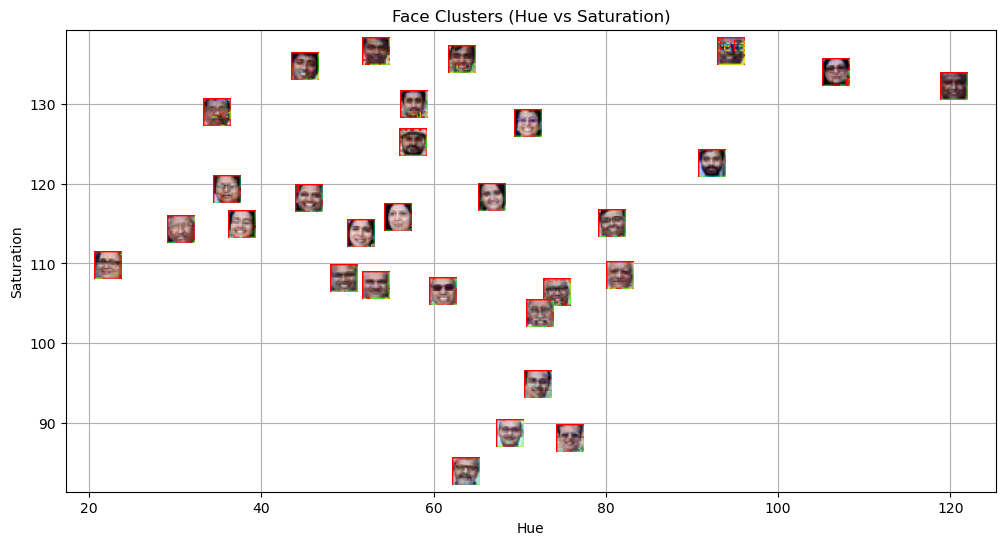

In [29]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2,random_state=42).fit(hue_saturation)

#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clusters (Hue vs Saturation)")
## Put grid
plt.grid(True)
## show the plot
plt.show()

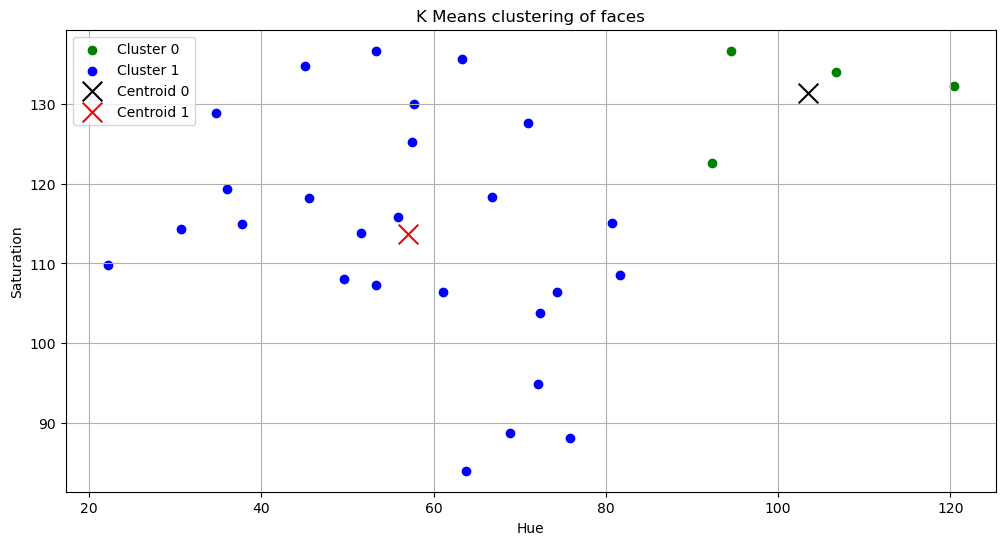

In [30]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],c='green',label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],c='blue',label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0],centroid_0[1],s=200,c='black',marker='x',label='Centroid 0')
plt.scatter(centroid_1[0],centroid_1[1],s=200,c='red',marker='x',label='Centroid 1')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("K Means clustering of faces")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()

In [31]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr Shashi Tharoor Lab 5.jpg')

# Detect face in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(cv2.cvtColor(template_img,cv2.COLOR_BGR2GRAY), 1.1, 4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x,y), (x + w,y + h), (0,255,0), 3)
cv2.imshow("Template Face",template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

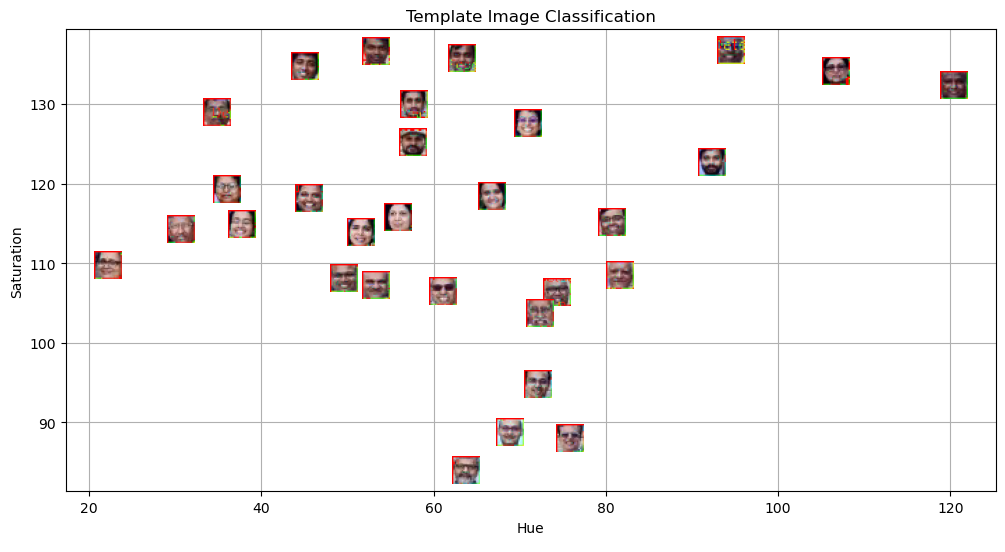

In [32]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
# Note: We take the first detected face [0]
template_face_region = template_hsv[template_faces[0][1]:template_faces[0][1] + template_faces[0][3], template_faces[0][0]:template_faces[0][0] + template_faces[0][2]]
template_hue = np.mean(template_face_region[:, :, 0])
template_saturation = np.mean(template_face_region[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
    
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Template Image Classification")
## Add grid
plt.grid(True)
## show plot
plt.show()

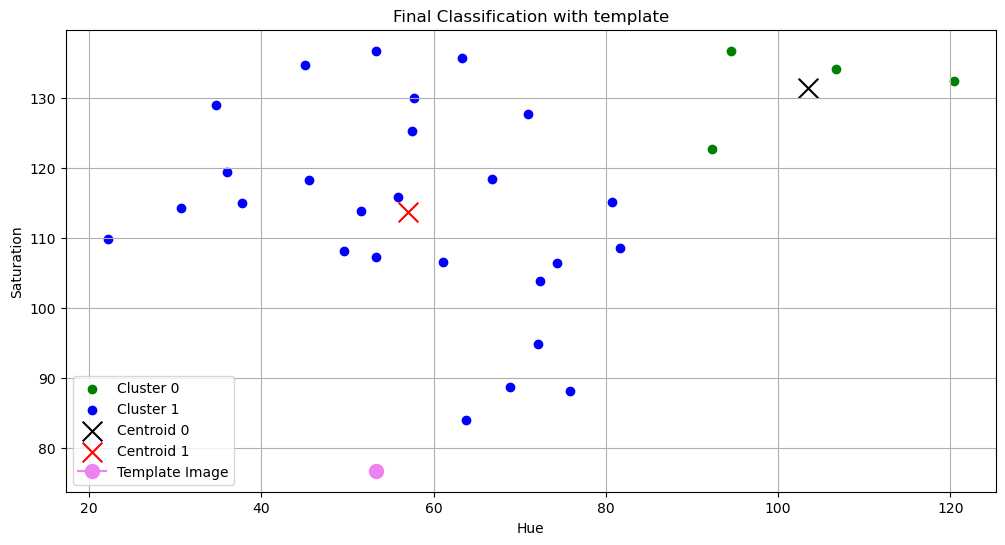

In [33]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], s=200, c='black', marker='x', label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], s=200, c='red', marker='x', label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label='Template Image' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Final Classification with template")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

Some common distance metrics are :- 


Euclidean Distance


Manhattan Distance 


Mahalanobis Distance


Chebyshev distance


Minkowski Distance


Cosine Distance


Hamming Distance

#### 2. What are some real-world applications of distance-based classification algorithms? 


Customer Behavior Prediction and Credit Worthiness Assessment in finance. 


Image Classification, Face Recognition, and Emotion Classification in computer vision. 


Spam Filtering and Document Classification in text processing. 


Autonomous Driving and Weather Forecasting.

#### 3. Explain various distance metrics.

Euclidean Distance: The straight line distance between two points. 
$$
d(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$


Manhattan Distance (L1 Norm): The sum of absolute differences. 
$$
d(x,y) = \sum_{i=1}^{n} |x_i - y_i|
$$


Mahalanobis Distance: A metric that accounts for the variance and correlations in the dataset. 
$$
d(x,y) = \sqrt{(x - y)^T S^{-1} (x - y)}
$$

Where:

- $S^{-1}$ = Inverse of the covariance matrix  
- $(x - y)^T$ = Transpose of the difference vector  


Chebyshev distance : The maximum absolute difference between corresponding elements.

$$
d(x,y) = \max_{i} |x_i - y_i|
$$


Minkowski Distance: A  metric that represents Euclidean, Manhattan, or Chebyshev distance depending on the value of 'p'. 

$$
d(x,y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

Special Cases:

- $p = 1$ → Manhattan Distance  
- $p = 2$ → Euclidean Distance  
- $p \to \infty$ → Chebyshev Distance


Cosine Distance: Measures the angle between vectors rather than magnitude.

$$
\text{cosine similarity} = \frac{x \cdot y}{\|x\| \|y\|}
$$



$$
d(x,y) = 1 - \frac{x \cdot y}{\|x\| \|y\|}
$$



Hamming Distance: Used for categorical or string data to count substitutions. 
$$
d(x,y) = \sum_{i=1}^{n} \mathbf{1}(x_i \neq y_i)
$$

Where:

- $\mathbf{1}(x_i \neq y_i)$ = 1, if $x_i \neq y_i$, else 0

#### PS - After writing the definitions and the distances I took help from llm to get the formulas in a readable form

#### 4. What is the role of cross validation in model performance? 

In KNN, there’s no fixed rule to choose the perfect value of K. So, we use cross validation to try different values and see 
which one works best. We keep a small part of the training data for validation and test the model multiple times with 
different K values. By comparing the validation errors, we pick the K that gives the best balance, avoiding overfitting (too 
complex) and underfitting (too simple), before finally testing it on unseen data.

#### 5. Explain variance and bias in terms of KNN? 

The value of K impacts the bias and variance of the model:

Low K : Low Bias but High Variance. This captures the noise in the data, leading to a complex decision boundary that might overfit.

High K: High Bias but Low Variance. The decision boundary becomes smoother, but if K is too large, the model becomes too simple and may underfit.

## THANK-YOU!